<a href="https://colab.research.google.com/github/RishitSaxena55/Face-Generation-Using-AutoEncoders-and-Variational-AutoEncoders/blob/main/AE_and_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Generation Using Variational AutoEncoders**

## Libraries

In [13]:
!pip uninstall -y numpy
!pip install numpy==1.24.0

Found existing installation: numpy 1.24.0
Uninstalling numpy-1.24.0:
  Successfully uninstalled numpy-1.24.0
  Using cached numpy-1.24.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.2 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.0 which is incompatible.
arviz 0.22.0 requir

In [1]:
!pip install facenet-pytorch --quiet
!pip install torchinfo --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

## LFW Face Dataset

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [3]:
!mkdir /root/.kaggle

In [4]:
with open("/root/.kaggle/kaggle.json", "w+") as f:
  f.write('{"username":"rishitsaxena55","key":"0d69850c02f093d6a44b1f2d7ad52c4c"}')

!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d atulanandjha/lfwpeople

Dataset URL: https://www.kaggle.com/datasets/atulanandjha/lfwpeople
License(s): GNU Lesser General Public License 3.0
 90% 210M/232M [00:00<00:00, 400MB/s]
100% 232M/232M [00:00<00:00, 444MB/s]


In [6]:
!unzip -q lfwpeople.zip -d lfwpeople

In [54]:
!tar xvzf /content/lfwpeople/lfw-funneled.tgz

tar: unrecognized option '--quiet'
Try 'tar --help' or 'tar --usage' for more information.


In [8]:
!rm lfwpeople.zip

In [9]:
!rm -r lfwpeople/

## Imports

In [1]:
!pip uninstall -y Pillow

Found existing installation: pillow 10.2.0
Uninstalling pillow-10.2.0:
  Successfully uninstalled pillow-10.2.0


In [2]:
!pip install Pillow==10.2.0

  Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.5 MB)


In [3]:
from facenet_pytorch import MTCNN
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchinfo import summary
from typing import List, Tuple
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import gc
import os
workers = 4
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Running on: {}".format(device))

Running on: cuda:0


## Data Preperation

In [4]:
data_dir = "/content/lfw_funneled"
batch_size = 1024

def collate_fn(batch: List[Tuple[Image.Image, int]]) -> Tuple[torch.Tensor, torch.Tensor]:
  """
  Collate fn for DataLoader to process a batch of images and labels

  Args:
      batch(List[Tuple[Image.Image, int]]): A list of tuples where each tuple contains:
        - A PIL Image(Image.Image) representing an image
        - An integer label(int) associated with the image

  Returns:
      Tuple[torch.Tensor, torch.Tensor]:
        - A tensor of images of shape (N, C, H, W) where N is batch_size, C is num_channels,
          H is the height and W is the width of the images. Each image is converted to a Tensor
          from its origional PIL format.
        - A tensor of labels of shape(batch_size), containing the corresponding integer labels.

  """

  # Separate images, labels from the batch
  images, labels = zip(*batch)

  # Convert PIL images to Tensor
  images = [transforms.ToTensor()(img) for img in images]

  # Stack all images into shape(N, C, H, W)
  images = torch.stack(images)

  # Convert labels to IntTensor
  labels = torch.IntTensor(labels)

  return images, labels


In [5]:
dataset = datasets.ImageFolder(data_dir)

# Add idx_to_class attribute of dataset to enable easy recoding of label indices to identify names later one.
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}

loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers, batch_size=batch_size)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
image_size = dataset[0][0].size[0]
print("Number of classes      : ", len(dataset.classes))
print("Number of train images : ", dataset.__len__())
print("Type of image          : ", type(dataset[0][0]))
print("Image Dim              : ", f'{image_size}x{image_size}')
print("Number of batches      : ", f'{len(loader)}')

Number of classes      :  5749
Number of train images :  13233
Type of image          :  <class 'PIL.Image.Image'>
Image Dim              :  250x250
Number of batches      :  13


## Plot one batch

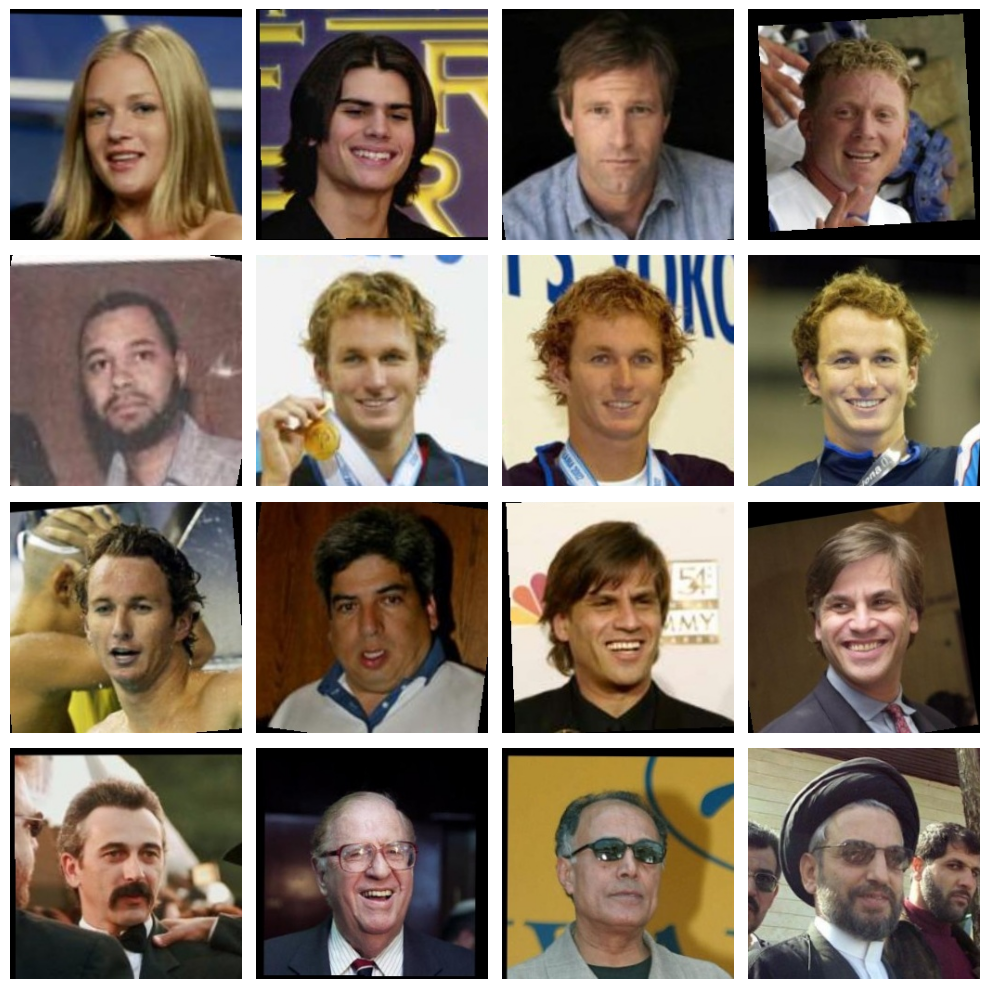

In [7]:
# Set up an 4x4 grid for 16 images in a batch
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
num_plots = 4 * 4 # Number of images to plot
# Loop over the dataloader
for batch in loader:
  # Get the batch of images and labels
  images, labels = batch
  # Loop over image in a batch
  for j in range(batch_size):
    img = torch.permute(images[j], (1, 2, 0)) # (C, H, W) -> (H, W, C)
    row = j // 4 # Row idx for subplot
    col = j % 4 # Col idx for sublplot
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    if j >= num_plots - 1:
      break # Stop after plotting specified number of images

  break

plt.tight_layout()
plt.show()


# Data Preprocessing: MTCNN for Face Detection and Cropping

In [8]:
mtcnn = MTCNN(keep_all=True, device=device)

In [9]:
def apply_mtcnn_crop(images: torch.Tensor, target_size=(128, 128)) -> torch.Tensor:
  """
  Function to apply MTCNN face detection and crop the images in a batch.

  Args:
      images (torch.Tensor): A batch of images of shape (batch_size, C, H, W).
      target_size (tuple): A target_size (H, W) to resize to after cropping.

  Returns:
      torch.Tensor: A batch of cropped images.

  """
  # Convert tensor batch to PIL images
  images_pil = [transforms.ToPILImage()(img) for images in images]

  cropped_images = []

  for img_pil in images_pil:
    boxes, _ = mtcnn.detect(img_pil) # Detect faces with MTCNN
    if boxes is not None:
      # Crop the image using first detected bounding box
      x1, y1, x2, y2 = boxes[0].tolist()
      img_pil = img_pil.crop((x1, y1, x2, y2))
    # Resize the image to target_size
    img_pil = img_pil.resize(target_size)
    # Convert cropped image back to tensor (if cropped)
    img_tensor = transforms.ToTensor()(img_pil)
    cropped_images.append(img_tensor)

  # Stack the cropped images into a single tensor
  return torch.stack(cropped_images)

## MTCNN Preprocessed Dataset (So we can add our images later!)

In [10]:
class MTCNNPreprocessedDataset(Dataset):
  def __init__(self, original_dataset, target_size=(128, 128), transform=None):
    """
    Args:
        original_dataset (Dataset): The original dataset to use (eg. a standard ImageFolder).
        target_size (tuple): The target size for resized images.
        transforms (callable, optional): Optional transform to be applied on a sample.
    """
    self.original_dataset = original_dataset
    self.target_size = target_size
    self.transform = transform

    # Preprocess the images during Initialization
    self.images = []
    self.labels = []
    self._preprocess_images()

  def __len__(self):
    return len(self.original_dataset)

  def __getitem__(self, idx):
    """
    Return Preprocessed image and it's label.
    """
    img, label = self.images[idx], self.labels[idx]

    # Apply additional transformations if provided (eg. Normalization)
    if self.transform:
      img = self.transform(img)

    return img, label

  def apply_mtcnn_crop(self, img: Image.Image):
    """
    Apply MTCNN Face Detection, Crop and Resize the image.

    Args:
        img (PIL.Image.Image): The input image.

    Returns:
        PIL.Image.Image: The cropped and resized image.
    """
    boxes, _ = mtcnn.detect(img) # Detect faces with MTCNN
    if boxes is not None:
      # Crop the image using first detected bounding box
      x1, y1, x2, y2 = boxes[0].tolist()
      img = img.crop((x1, y1, x2, y2))
    # Resize the image to target_size
    img = img.resize(self.target_size)

    return img

  def _preprocess_images(self):
    """
    Apply MTCNN Face Detection, Crop and Resize all the images in the dataset.
    """
    print("Cropping images with MTCNN: ")
    for idx in tqdm(range(len(self.original_dataset))):
      img, label = self.original_dataset[idx] # Get the image and label from original dataset
      img = self.apply_mtcnn_crop(img) # Apply MTCNN Crop
      self.images.append(img)
      self.labels.append(label)

## Create a MTCNN_Preprocessed dataset/dataLoader

In [11]:
# transform: Convert to Tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

# Create a custim MTCNN Prepreocessed dataset
mtcnn_preprocessed_dataset = MTCNNPreprocessedDataset(dataset, target_size=(128, 128), transform=transform)

# Create a dataloader for preprocessed images
batch_size = 1024
mtcnn_preprocessed_loader = DataLoader(mtcnn_preprocessed_dataset, batch_size=batch_size, shuffle=True)

Cropping images with MTCNN: 


100%|██████████| 13233/13233 [07:44<00:00, 28.51it/s]


## Plot Cropped Face Images detected by MTCNN

Number of batches:  13


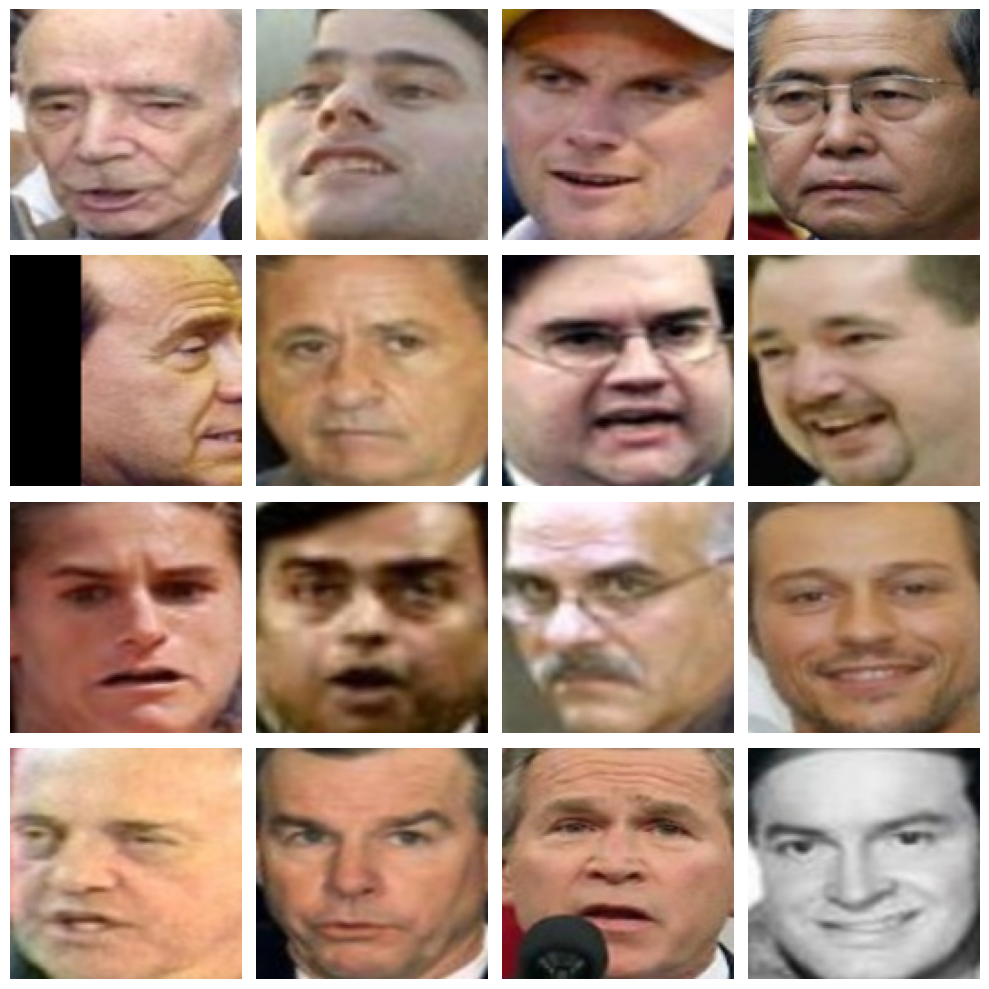

In [12]:
# Print Number of batches and shape of each batch
print("Number of batches: ", len(mtcnn_preprocessed_loader))

# Set up an 4x4 grid for 16 images in a batch
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
num_plots = 4 * 4 # Number of images to plot
# Loop over the dataloader
for batch in mtcnn_preprocessed_loader:
  # Get the batch of images and labels
  images, labels = batch
  # Loop over image in a batch
  for j in range(batch_size):
    img = torch.permute(images[j], (1, 2, 0)) # (C, H, W) -> (H, W, C)
    row = j // 4 # Row idx for subplot
    col = j % 4 # Col idx for sublplot
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    if j >= num_plots - 1:
      break # Stop after plotting specified number of images

  break

plt.tight_layout()
plt.show()


# The AutoEncoder (AE)

In [13]:
class Autoencoder(nn.Module):
  def __init__(self, in_ch=3, ndf=32, latent_space_size=256):
    super(Autoencoder, self).__init__()

    self.latent_space_size = latent_space_size
    self.ndf = ndf

    # Encoders: Convolutional layers to extract features
    # [batch_size, 3, 128, 128] -> [batch_size, ndf, 64, 64]
    # [batch_size, ndf, 64, 64] -> [batch_size, ndf*2, 32, 32]
    # [batch_size, ndf*2, 32, 32] -> [batch_size, ndf*4, 16, 16]
    # [batch_size, ndf*4, 16, 16] -> [batch_size, ndf*8, 8, 8]
    self.encoder = nn.Sequential(
        nn.Conv2d(in_ch, ndf, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf),
        nn.LeakyReLU(),
        nn.Conv2d(ndf, ndf*2, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf*2),
        nn.LeakyReLU(),
        nn.Conv2d(ndf*2, ndf*4, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf*4),
        nn.LeakyReLU(),
        nn.Conv2d(ndf*4, ndf*8, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf*8),
        nn.LeakyReLU()
    )

    # Latent space size
    # FC layer to output latent vector
    # Fully Connected to latent space
    self.flattened_size = ndf*8*8*8
    self.fc = nn.Linear(self.flattened_size, self.latent_space_size)

    # Decoder: Convolutional Transpose layers (Deconvolution)
    self.fc_decode = nn.Linear(self.latent_space_size, self.flattened_size)

    # [batch_size, ndf*8, 8, 8] -> [batch_size, ndf*4, 16, 16]
    # [batch_size, ndf*4, 16, 16] -> [batch_size, ndf*2, 32, 32]
    # [batch_size, ndf*2, 32, 32] -> [batch_size, ndf, 64, 64]
    # [batch_size, ndf, 64, 64] -> [batch_size, in_ch, 128, 128]
    self.decoder = nn.Sequential(
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf*8, ndf*4, kernel_size=3, stride=1, padding=1),
        nn.InstanceNorm2d(ndf*4),
        nn.LeakyReLU(),
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf*4, ndf*2, kernel_size=3, stride=1, padding=1),
        nn.InstanceNorm2d(ndf*2),
        nn.LeakyReLU(),
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf*2, ndf, kernel_size=3, stride=1, padding=1),
        nn.InstanceNorm2d(ndf),
        nn.LeakyReLU(),
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf, in_ch, kernel_size=3, stride=1, padding=1),
        nn.Sigmoid()
    )

  def encode(self, x: torch.Tensor) -> torch.Tensor:
    """
    Encodes the input image into latent representation.

    Args:
        x (torch.Tensor): Input tensor of shape (batch_size, 3, 128, 128).

    Returns:
        : Latent Representation with shape (batch_size, latent_space_size).
    """

    x = self.encoder(x) # Output shape (batch_size, ndf*8, 8, 8)
    x = torch.flatten(x, 1) # Flatten the output
    return self.fc(x)

  def decode(self, z: torch.Tensor) -> torch.Tensor:
    """
    Decode the latent space representation back into reconstructed image.

    Args:
        z (torch.Tensor): latent space tensor with shape (batch_size, latent_space_size).

    Returns:
        : Reconstructed image tensor with shape (batch_shape, 3, 128, 128).
    """
    z = self.fc_decode(z) # Output shape (batch_shape, flattened_size)
    z = torch.reshape(z, (z.size(0), self.ndf*8, 8, 8)) # Reshape
    return self.decoder(z)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass: Encodes and Decodes the input image.

    Args:
        x (torch.Tensor): Input image tensor with shape (batch_size, 3, 128, 128).

    Returns:
        : Reconstructed image tensor with shape (batch_size, 3, 128, 128).
    """
    latent = self.encode(x)
    decoded = self.decode(latent)
    return decoded

  def loss_function(self, recon_x: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
    """
    Calculates the AutoEncoder loss, which consists of reconstruction loss(BCE).

    Args:
        recon_x (torch.Tensor): Reconstructed image tensor of shape (batch_size, 3, 128, 128).
        x (torch.Tensor): Original image tensor of shape (batch_size, 3, 128, 128).

    Returns:
        : Total Loss value (BCE loss).
    """
    # Reconstruction loss (BCE loss w logits, sigmoid is applied)
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    return recon_loss


In [14]:
# Instantiate the AutoEncoder
AE_model = Autoencoder().to(device)
summary(AE_model, input_size =(batch_size, 3, 128, 128))

Layer (type:depth-idx)                   Output Shape              Param #
Autoencoder                              [1024, 3, 128, 128]       --
├─Sequential: 1-1                        [1024, 256, 8, 8]         --
│    └─Conv2d: 2-1                       [1024, 32, 64, 64]        1,568
│    └─InstanceNorm2d: 2-2               [1024, 32, 64, 64]        --
│    └─LeakyReLU: 2-3                    [1024, 32, 64, 64]        --
│    └─Conv2d: 2-4                       [1024, 64, 32, 32]        32,832
│    └─InstanceNorm2d: 2-5               [1024, 64, 32, 32]        --
│    └─LeakyReLU: 2-6                    [1024, 64, 32, 32]        --
│    └─Conv2d: 2-7                       [1024, 128, 16, 16]       131,200
│    └─InstanceNorm2d: 2-8               [1024, 128, 16, 16]       --
│    └─LeakyReLU: 2-9                    [1024, 128, 16, 16]       --
│    └─Conv2d: 2-10                      [1024, 256, 8, 8]         524,544
│    └─InstanceNorm2d: 2-11              [1024, 256, 8, 8]         -

# The Variational AutoEncoder (VAE)

In [15]:
class VariationalAutoencoder(nn.Module):
  def __init__(self, in_ch=3, ndf=32, latent_space_size=256):
    super(VariationalAutoencoder, self).__init__()

    self.latent_space_size = latent_space_size
    self.ndf = ndf

    # Encoders: Convolutional layers to extract features
    # [batch_size, 3, 128, 128] -> [batch_size, ndf, 64, 64]
    # [batch_size, ndf, 64, 64] -> [batch_size, ndf*2, 32, 32]
    # [batch_size, ndf*2, 32, 32] -> [batch_size, ndf*4, 16, 16]
    # [batch_size, ndf*4, 16, 16] -> [batch_size, ndf*8, 8, 8]
    self.encoder = nn.Sequential(
        nn.Conv2d(in_ch, ndf, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf),
        nn.LeakyReLU(),
        nn.Conv2d(ndf, ndf*2, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf*2),
        nn.LeakyReLU(),
        nn.Conv2d(ndf*2, ndf*4, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf*4),
        nn.LeakyReLU(),
        nn.Conv2d(ndf*4, ndf*8, kernel_size=4, stride=2, padding=1),
        nn.InstanceNorm2d(ndf*8),
        nn.LeakyReLU()
    )
    # Latent space size (for VAE, we need mu and log_var of the latent distribution)
    self.flattened_size = ndf*8*8*8

    # FC layer to output mean and log variance for the latent space
    self.fc_mu = nn.Linear(self.flattened_size, self.latent_space_size)
    self.fc_log_var = nn.Linear(self.flattened_size, self.latent_space_size)

    # Decoder: Convolutional Transpose layers (Deconvolution)
    self.fc_decode = nn.Linear(self.latent_space_size, self.flattened_size)

    # [batch_size, ndf*8, 8, 8] -> [batch_size, ndf*4, 16, 16]
    # [batch_size, ndf*4, 16, 16] -> [batch_size, ndf*2, 32, 32]
    # [batch_size, ndf*2, 32, 32] -> [batch_size, ndf, 64, 64]
    # [batch_size, ndf, 64, 64] -> [batch_size, in_ch, 128, 128]
    self.decoder = nn.Sequential(
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf*8, ndf*4, kernel_size=3, stride=1, padding=1),
        nn.InstanceNorm2d(ndf*4),
        nn.LeakyReLU(),
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf*4, ndf*2, kernel_size=3, stride=1, padding=1),
        nn.InstanceNorm2d(ndf*2),
        nn.LeakyReLU(),
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf*2, ndf, kernel_size=3, stride=1, padding=1),
        nn.InstanceNorm2d(ndf),
        nn.LeakyReLU(),
        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
        nn.Conv2d(ndf, in_ch, kernel_size=3, stride=1, padding=1),
        nn.Sigmoid()
    )

  def encode(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
    """
    Encodes the input image into latent distribution (mean and log variance).

    Args:
        x (torch.Tensor): Input tensor of shape (batch_size, 3, 128, 128).

    Returns:
        : mean (mu) and log variance (log_var) tensors with shape (batch_size, latent_space_size).
    """

    x = self.encoder(x) # Output shape (batch_size, ndf*8, 8, 8)
    x = torch.flatten(x, 1) # Flatten the output
    mu = self.fc_mu(x) # Mean of latent space (batch_size, latent_space_size)
    log_var = self.fc_log_var(x) # Log variance od latent space (batch_size, latent_space_size)
    return mu, log_var

  def reparameterize(self, mu: torch.Tensor, log_var: torch.Tensor) -> torch.Tensor:
    """
    Reparameterization trick: Sample z from N(mu, sigma^2) using mu and log_var.

    Args:
        mu (torch.Tensor): Mean of latent space woth shape (batch_size, latent_space_size).
        log_var (torch.Tensor): Log variance of latent space with shape (batch_size, latent_space_size).

    Returns:
        : Latent vector z sampled from N(mu, sigma^2).
    """
    std = torch.exp(0.5 * log_var) # Standard deviation from log_var
    eps = torch.randn_like(std) # Sample from N(0, 1)
    return mu + eps * std

  def decode(self, z: torch.Tensor) -> torch.Tensor:
    """
    Decode the latent space representation back into reconstructed image.

    Args:
        z (torch.Tensor): latent space tensor with shape (batch_size, latent_space_size).

    Returns:
        : Reconstructed image tensor with shape (batch_shape, 3, 128, 128).
    """
    z = self.fc_decode(z) # Output shape (batch_shape, flattened_size)
    z = torch.reshape(z, (z.size(0), self.ndf*8, 8, 8)) # Reshape
    return self.decoder(z)

  def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    Forward pass: Encodes the input, Applies reparametrization trick and decodes.

    Args:
        x (torch.Tensor): Input image tensor with shape (batch_size, 3, 128, 128).

    Returns:
        : Reconstructed image tensor with shape (batch_size, 3, 128, 128).
        mu (torch.Tensor): Mean of latent space woth shape (batch_size, latent_space_size).
        log_var (torch.Tensor): Log variance of latent space with shape (batch_size, latent_space_size).
    """
    mu, log_var = self.encode(x)
    z = self.reparameterize(mu, log_var)
    decoded = self.decode(z)
    return decoded, mu, log_var

  def loss_function(self, recon_x: torch.Tensor, x: torch.Tensor, mu: torch.Tensor, log_var: torch.Tensor, kl_weight: float=0.00025) -> torch.Tensor:
    """
    Calculates the VAE loss, which is sum of reconstruction loss and KL divergence.

    Args:
        recon_x (torch.Tensor): Reconstructed image tensor of shape (batch_size, 3, 128, 128).
        x (torch.Tensor): Original image tensor of shape (batch_size, 3, 128, 128).
        mu (torch.Tensor): Mean of latent space woth shape (batch_size, latent_space_size).
        log_var (torch.Tensor): Log variance of latent space with shape (batch_size, latent_space_size).
        kl_weight (float): Weight of the KL divergence term.
    Returns:
        : Total VAE Loss value.
    """
    # Reconstruction loss (BCE loss)
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')

    # KL divergence between learned distribution and standard Normal distribution
    kl_div = -0.5 * torch.sum(1 + log_var - mu**2 - log_var.exp())

    # Total VAE loss is the sum of reconstruction loss and KL divergence
    return recon_loss + kl_weight * kl_div


In [16]:
# Instantiate the Variational AutoEncoder
VAE_model = VariationalAutoencoder().to(device)
summary(VAE_model, input_size=(batch_size, 3, 128, 128))

Layer (type:depth-idx)                   Output Shape              Param #
VariationalAutoencoder                   [1024, 3, 128, 128]       --
├─Sequential: 1-1                        [1024, 256, 8, 8]         --
│    └─Conv2d: 2-1                       [1024, 32, 64, 64]        1,568
│    └─InstanceNorm2d: 2-2               [1024, 32, 64, 64]        --
│    └─LeakyReLU: 2-3                    [1024, 32, 64, 64]        --
│    └─Conv2d: 2-4                       [1024, 64, 32, 32]        32,832
│    └─InstanceNorm2d: 2-5               [1024, 64, 32, 32]        --
│    └─LeakyReLU: 2-6                    [1024, 64, 32, 32]        --
│    └─Conv2d: 2-7                       [1024, 128, 16, 16]       131,200
│    └─InstanceNorm2d: 2-8               [1024, 128, 16, 16]       --
│    └─LeakyReLU: 2-9                    [1024, 128, 16, 16]       --
│    └─Conv2d: 2-10                      [1024, 256, 8, 8]         524,544
│    └─InstanceNorm2d: 2-11              [1024, 256, 8, 8]         -

## Utils

In [17]:
import math

class KLWeightScheduler:
  def __init__(self, kl_weight_max: float, total_epochs: int, low_epochs: int = 5, warmup_epochs: int = 10):
    """
    S shaped growth scheduler for KL weightwith an initial low period.

    Args:
        kl_weight_max (float): The maximum KL weight at the end of warm-up.
        total_epochs (int): The total number of epochs for training.
        low_epochs (int): The number of epochs the KL weight remains low.
        param_warmup_epochs (int): THe number of epochs over which the KL weight increases.
    """
    self.kl_weight_max = kl_weight_max
    self.total_epochs = total_epochs
    self.low_epochs = low_epochs
    self.warmup_epochs = warmup_epochs
    self.last_epoch = 0

  def get_kl_weight(self):
    """
    Calculate the KL weight using a modified sigmoid growth function.

    Returns:
        : The current KL weight value.
    """
    # Before the warmup phase keep the weight low
    if self.last_epoch < self.low_epochs:
      kl_weight = 0.0
    else:
      # Calculate the progress in the warm-up phase
      progress = (self.last_epoch - self.low_epochs) / self.warmup_epochs
      # Sigmoid function to generate S-shaped curve
      kl_weight = self.kl_weight_max / (1 + math.exp(-10 * (progress - 0.5)))

      # Ensure kl_weight does not exceed kl_weight_max
      kl_weigth = min(kl_weight, self.kl_weight_max)

    return kl_weight

  def step(self):
    """
    Increment the epoch count for KL weight scheduling.
    """
    self.last_epoch += 1


In [18]:
def train_step(model: nn.Module, optimizer, train_loader: DataLoader, kl_weight: float = 0.0):
  """
  Perform a single training step over the entire training dataset with exponential warmup for KL weight.

  Args:
      model (nn.Module): The neural network model to be trained.
      optimizer: The optimizer used to update model's parameters.
      train_loader (DataLoader): DataLoader for the training dataset, provide batches of data.
      kl_weight (float): The KL weight for the model.

  Returns:
      : The average loss over the training dataset.
  """
  model.train()
  total_loss = 0
  num_batches = len(train_loader)

  # Wrap the train_loader with tqdm to show progress bar
  with tqdm(train_loader, unit='batch', desc=f'[Training]:') as pbar:
    for data, _ in pbar:
      optimizer.zero_grad()

      # Move data to GPU if available
      data = data.cuda()

      # Forward pass
      if isinstance(model, VariationalAutoencoder):
        reconstructed, mu, log_var = model(data)
        loss = model.loss_function(reconstructed, data, mu, log_var, kl_weight=kl_weight)
      else:
        reconstructed = model(data)
        loss = model.loss_function(reconstructed, data)

      # Backward pass with scaled Gradients
      loss.backward()
      optimizer.step()

      # Accumulate total loss
      total_loss += loss.item()

      # Update the progress bar with current average batch loss
      pbar.set_postfix(loss=loss.item())

      # Clean up
      del reconstructed, data, loss
      torch.cuda.empty_cache()

  # Calculate the average loss for the epoch
  avg_loss = total_loss / num_batches
  return avg_loss


In [19]:
def validate_step(model: nn.Module, val_loader: DataLoader, epoch: int, path: str):
  """
  Runs a validation step and plots a few images with their reconstructions.
  Saves the plot as an image file.

  Args:
      model (nn.Module): Tranined model.
      val_loader (DataLoader): DataLoader for the validation dataset.
      epoch (int): Current epoch number.
      path (str): File path for saving.
  """
  root = os.path.join(path, 'validation_images')
  os.makedirs(root, exist_ok=True)

  model.eval() # Set the model to evaluation mode
  with torch.no_grad():
    # Get a batch of validation data
    data, _ = next(iter(val_loader))
    data = data.cuda() # Move data to cuda if available

    # Forward pass to get reconstructions
    if isinstance(model, VariationalAutoencoder):
      reconstructed, _, _ = model(data)
    else:
      reconstructed = model(data)

    # Move data back to CPU for plotting
    data = data.cpu()
    reconstructed = reconstructed.cpu()

    # Plot original and reconstructed images
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range (5):
      # Original images
      axes[0, i].imshow(data[i].permute(1, 2, 0).squeeze(), cmap='gray')
      axes[0, i].set_title('Original')
      axes[0, i].axis('off')

      # Reconstructed images
      axes[1, i].imshow(reconstructed[i].permute(1, 2, 0), cmap='gray')
      axes[1, i].set_title('Reconstructed')
      axes[1, i].axis('off')

    plt.tight_layout()
    impath = os.path.join(root, f'validation_epoch_{epoch}.png')
    plt.savefig(impath)
    plt.close(fig)
    print(f'Saved validation results for epoch {epoch} as validation_epoch_{epoch}.png')


In [20]:
def save_model(model, optimizer, scheduler, metric, epoch, path):
  """
  Saves the model, optimizer and scheduler states along with a metric to a specified path.

  Args:
      model (nn.Module): Model to be saved.
      optimizer (Optimizer): Optimizer state to save.
      scheduler (Scheduler or None): Scheduler state to save.
      metric (tuple): Metrc tuple (name, value) to save.
      epoch (int): Current epoch number.
      path (str): File path for saving.
  """
  # Ensure metric is provided as a tuple with the correct structure
  if not (isinstance(metric, tuple) and len(metric) == 2):
    raise ValueError("metric must be a tuple in the form of (name, value)")

  torch.save(
      {
      'model_state_dict': model.state_dict(),
      'optimizer_dtate_dict': optimizer.state_dict(),
      'scheduler_state_dict': scheduler.state_dict() if scheduler else {},
      metric[0]: metric[1],
      'epoch': epoch
      },
      path
  )


In [21]:
def load_model(model, optimizer, scheduler, path):
  """
  Loads the model, optimizer and scheduler states along with a saved metric and epoch from a specified path.

  Args:
      model (nn.Module): Model instance to load the state into.
      optimizer (Optimizer): Optimizer instance to load the state into.
      scheduler (Scheduler or None): Scheduler instance to load the state into, if applicable.
      path (str): File path to load the checkpoint from.

  Returns:
      tuple: A tuple containing the metric (name, value) and the last saved epoch.
  """
  # Load the checkpoint from the specified path
  checkpoint = torch.load(path)

  # Load the model's state dictionary
  model.load_state_dict(checkpoint['model_state_dict'])

  # Load the optimizer's state dictionary
  if optimizer:
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

  # Load the scheduler's state dictionary if provided
  if scheduler:
    scheduler_state = checkpoint.get('scheduler_state_dict', {})
    if scheduler_state:
      scheduler.load_state_dict(scheduler_state)

  # Retreive the metric from the checkpoint
  # Identify the metric keys (excluding reserved keys)
  metric_keys = [key for key in checkpoint.keys() if key not in {'model_state_dict', 'optimizer_state_dict', 'scheduler_state_dict', 'epoch'}]
  if len(metric_keys) != 1:
    raise ValueError(f'Unexpected format:More than one metric key found in checkpoint')
  metric_name = metric_keys[0]
  metric_value = checkpoint[metric_name]

  # Retreive the last saved epoch
  epoch = checkpoint.get('epoch', 0)

  return (metric_name, metric_value), epoch


# Train VAE

In [ ]:
gc.collect()
torch.cuda.empty_cache()
checkpoint_root = os.path.join(os.getcwd(), 'vae_checkpoints')
os.makedirs(checkpoint_root, exist_ok=True)
checkpoint_filename = 'vae_model'

# Choose model to train
model = VAE_model

# Set epochs
# Set up optimizer
# Set up scheduler
epochs = 120
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=1e-8)

# Define KL weight scheduler with linear warm up
kl_weight_max = 2.0 # Maximum KL weight
kl_scheduler = KLWeightScheduler(kl_weight_max, epochs, low_epochs=10, warmup_epochs=10)

best_loss = float('inf')

for epoch in range(epochs):

  print("\nEpoch {}/{}".format(epoch+1, epochs))

  curr_lr = float(optimizer.param_groups[0]['lr'])
  kl_weight = kl_scheduler.get_kl_weight()

  train_loss = train_step(model, optimizer, mtcnn_preprocessed_loader, kl_weight)

  print("\nEpoch {}/{}: \nTrain Loss {:.04f}\t Learning Rate {:.06f}\t KL Weight {:.06f}".format(
        epoch + 1, epochs, train_loss, curr_lr, kl_weight))

  scheduler.step()
  kl_scheduler.step()

  if (epoch + 1) % 10 == 0:
    validate_step(model, mtcnn_preprocessed_loader, epoch+1, checkpoint_root)

  if best_loss >= train_loss:
    best_loss = train_loss
    epoch_model_path = os.path.join(checkpoint_root, (checkpoint_filename + str(epoch) + '.pth'))
    save_model(model, optimizer, scheduler, ('loss', train_loss), epoch, epoch_model_path)
    print("Saved best loss model")



Epoch 1/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=8.87e+5]



Epoch 1/120: 
Train Loss 1197429.1058	 Learning Rate 0.001000	 KL Weight 0.000000
Saved best loss model

Epoch 2/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=7.83e+5]



Epoch 2/120: 
Train Loss 875362.1106	 Learning Rate 0.001000	 KL Weight 0.000000
Saved best loss model

Epoch 3/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=6.62e+5]



Epoch 3/120: 
Train Loss 764886.1202	 Learning Rate 0.000999	 KL Weight 0.000000
Saved best loss model

Epoch 4/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=6.09e+5]



Epoch 4/120: 
Train Loss 682915.4279	 Learning Rate 0.000998	 KL Weight 0.000000
Saved best loss model

Epoch 5/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=5.79e+5]



Epoch 5/120: 
Train Loss 640082.2500	 Learning Rate 0.000997	 KL Weight 0.000000
Saved best loss model

Epoch 6/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=5.68e+5]



Epoch 6/120: 
Train Loss 596278.9279	 Learning Rate 0.000996	 KL Weight 0.000000
Saved best loss model

Epoch 7/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.32e+5]



Epoch 7/120: 
Train Loss 572366.5337	 Learning Rate 0.000994	 KL Weight 0.000000
Saved best loss model

Epoch 8/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.4e+5]



Epoch 8/120: 
Train Loss 556398.4904	 Learning Rate 0.000992	 KL Weight 0.000000
Saved best loss model

Epoch 9/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=4.83e+5]



Epoch 9/120: 
Train Loss 536680.7428	 Learning Rate 0.000989	 KL Weight 0.000000
Saved best loss model

Epoch 10/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=4.54e+5]



Epoch 10/120: 
Train Loss 500272.8462	 Learning Rate 0.000986	 KL Weight 0.000000
Saved validation results for epoch 10 as validation_epoch_10.png
Saved best loss model

Epoch 11/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=9.53e+5]



Epoch 11/120: 
Train Loss 1286971.7837	 Learning Rate 0.000983	 KL Weight 0.013386

Epoch 12/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=1.02e+6]



Epoch 12/120: 
Train Loss 1148885.6250	 Learning Rate 0.000979	 KL Weight 0.035972

Epoch 13/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=1.22e+6]



Epoch 13/120: 
Train Loss 1434553.4423	 Learning Rate 0.000976	 KL Weight 0.094852

Epoch 14/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=1.66e+6]



Epoch 14/120: 
Train Loss 1864057.8173	 Learning Rate 0.000971	 KL Weight 0.238406

Epoch 15/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.97s/batch, loss=1.85e+6]



Epoch 15/120: 
Train Loss 2205309.0481	 Learning Rate 0.000967	 KL Weight 0.537883

Epoch 16/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=2.25e+6]



Epoch 16/120: 
Train Loss 2907786.5000	 Learning Rate 0.000962	 KL Weight 1.000000

Epoch 17/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=2.38e+6]



Epoch 17/120: 
Train Loss 2743929.3462	 Learning Rate 0.000957	 KL Weight 1.462117

Epoch 18/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=1.71e+6]



Epoch 18/120: 
Train Loss 2304793.2692	 Learning Rate 0.000951	 KL Weight 1.761594

Epoch 19/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=2.32e+6]



Epoch 19/120: 
Train Loss 2288329.5096	 Learning Rate 0.000946	 KL Weight 1.905148

Epoch 20/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=1.41e+6]



Epoch 20/120: 
Train Loss 1754577.3654	 Learning Rate 0.000939	 KL Weight 1.964028
Saved validation results for epoch 20 as validation_epoch_20.png

Epoch 21/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=1.11e+6]



Epoch 21/120: 
Train Loss 1263470.5385	 Learning Rate 0.000933	 KL Weight 1.986614

Epoch 22/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=1.03e+6]



Epoch 22/120: 
Train Loss 1160112.5385	 Learning Rate 0.000926	 KL Weight 1.995055

Epoch 23/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=9.26e+5]



Epoch 23/120: 
Train Loss 1064765.3077	 Learning Rate 0.000919	 KL Weight 1.998178

Epoch 24/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=8.91e+5]



Epoch 24/120: 
Train Loss 1001907.3750	 Learning Rate 0.000912	 KL Weight 1.999329

Epoch 25/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=8.86e+5]



Epoch 25/120: 
Train Loss 936101.3029	 Learning Rate 0.000905	 KL Weight 1.999753

Epoch 26/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=9.22e+5]



Epoch 26/120: 
Train Loss 960545.8942	 Learning Rate 0.000897	 KL Weight 1.999909

Epoch 27/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=8.25e+5]



Epoch 27/120: 
Train Loss 919440.4375	 Learning Rate 0.000889	 KL Weight 1.999967

Epoch 28/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=8e+5]



Epoch 28/120: 
Train Loss 913068.8558	 Learning Rate 0.000880	 KL Weight 1.999988

Epoch 29/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=7.75e+5]



Epoch 29/120: 
Train Loss 846921.6971	 Learning Rate 0.000872	 KL Weight 1.999995

Epoch 30/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=7.8e+5]



Epoch 30/120: 
Train Loss 821269.7740	 Learning Rate 0.000863	 KL Weight 1.999998
Saved validation results for epoch 30 as validation_epoch_30.png

Epoch 31/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=9.08e+5]



Epoch 31/120: 
Train Loss 908802.4615	 Learning Rate 0.000854	 KL Weight 1.999999

Epoch 32/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=7.67e+5]



Epoch 32/120: 
Train Loss 851026.6394	 Learning Rate 0.000844	 KL Weight 2.000000

Epoch 33/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=8.13e+5]



Epoch 33/120: 
Train Loss 900347.9856	 Learning Rate 0.000835	 KL Weight 2.000000

Epoch 34/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=7.47e+5]



Epoch 34/120: 
Train Loss 827106.5288	 Learning Rate 0.000825	 KL Weight 2.000000

Epoch 35/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=8.33e+5]



Epoch 35/120: 
Train Loss 845815.7933	 Learning Rate 0.000815	 KL Weight 2.000000

Epoch 36/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=7.65e+5]



Epoch 36/120: 
Train Loss 867262.0000	 Learning Rate 0.000804	 KL Weight 2.000000

Epoch 37/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=7.47e+5]



Epoch 37/120: 
Train Loss 810318.9808	 Learning Rate 0.000794	 KL Weight 2.000000

Epoch 38/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=7.03e+5]



Epoch 38/120: 
Train Loss 767860.5144	 Learning Rate 0.000783	 KL Weight 2.000000

Epoch 39/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=6.95e+5]



Epoch 39/120: 
Train Loss 756233.3750	 Learning Rate 0.000772	 KL Weight 2.000000

Epoch 40/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=7.09e+5]



Epoch 40/120: 
Train Loss 771490.4567	 Learning Rate 0.000761	 KL Weight 2.000000
Saved validation results for epoch 40 as validation_epoch_40.png

Epoch 41/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=7.15e+5]



Epoch 41/120: 
Train Loss 748980.1202	 Learning Rate 0.000750	 KL Weight 2.000000

Epoch 42/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=6.9e+5]



Epoch 42/120: 
Train Loss 732602.5769	 Learning Rate 0.000739	 KL Weight 2.000000

Epoch 43/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=7.08e+5]



Epoch 43/120: 
Train Loss 758735.4808	 Learning Rate 0.000727	 KL Weight 2.000000

Epoch 44/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=7.08e+5]



Epoch 44/120: 
Train Loss 751430.0096	 Learning Rate 0.000715	 KL Weight 2.000000

Epoch 45/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=6.62e+5]



Epoch 45/120: 
Train Loss 731266.9808	 Learning Rate 0.000703	 KL Weight 2.000000

Epoch 46/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=6.45e+5]



Epoch 46/120: 
Train Loss 715989.3173	 Learning Rate 0.000691	 KL Weight 2.000000

Epoch 47/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=7.14e+5]



Epoch 47/120: 
Train Loss 733095.8413	 Learning Rate 0.000679	 KL Weight 2.000000

Epoch 48/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=6.62e+5]



Epoch 48/120: 
Train Loss 721221.5817	 Learning Rate 0.000667	 KL Weight 2.000000

Epoch 49/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=6.7e+5]



Epoch 49/120: 
Train Loss 707381.4808	 Learning Rate 0.000655	 KL Weight 2.000000

Epoch 50/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.88s/batch, loss=6.69e+5]



Epoch 50/120: 
Train Loss 705743.4183	 Learning Rate 0.000642	 KL Weight 2.000000
Saved validation results for epoch 50 as validation_epoch_50.png

Epoch 51/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=6.7e+5]



Epoch 51/120: 
Train Loss 730237.5481	 Learning Rate 0.000629	 KL Weight 2.000000

Epoch 52/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=6.45e+5]



Epoch 52/120: 
Train Loss 698586.5673	 Learning Rate 0.000617	 KL Weight 2.000000

Epoch 53/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=6.41e+5]



Epoch 53/120: 
Train Loss 692948.1731	 Learning Rate 0.000604	 KL Weight 2.000000

Epoch 54/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=6.29e+5]



Epoch 54/120: 
Train Loss 687168.0481	 Learning Rate 0.000591	 KL Weight 2.000000

Epoch 55/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=6.18e+5]



Epoch 55/120: 
Train Loss 674184.8990	 Learning Rate 0.000578	 KL Weight 2.000000

Epoch 56/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=6.13e+5]



Epoch 56/120: 
Train Loss 663863.7837	 Learning Rate 0.000565	 KL Weight 2.000000

Epoch 57/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=6.48e+5]



Epoch 57/120: 
Train Loss 692555.6731	 Learning Rate 0.000552	 KL Weight 2.000000

Epoch 58/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=6.17e+5]



Epoch 58/120: 
Train Loss 670390.3125	 Learning Rate 0.000539	 KL Weight 2.000000

Epoch 59/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=6.1e+5]



Epoch 59/120: 
Train Loss 664325.7115	 Learning Rate 0.000526	 KL Weight 2.000000

Epoch 60/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=6.01e+5]



Epoch 60/120: 
Train Loss 657003.9471	 Learning Rate 0.000513	 KL Weight 2.000000
Saved validation results for epoch 60 as validation_epoch_60.png

Epoch 61/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.92s/batch, loss=6.08e+5]



Epoch 61/120: 
Train Loss 654305.6731	 Learning Rate 0.000500	 KL Weight 2.000000

Epoch 62/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=6.17e+5]



Epoch 62/120: 
Train Loss 655024.7115	 Learning Rate 0.000487	 KL Weight 2.000000

Epoch 63/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=5.84e+5]



Epoch 63/120: 
Train Loss 644832.7885	 Learning Rate 0.000474	 KL Weight 2.000000

Epoch 64/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=6.08e+5]



Epoch 64/120: 
Train Loss 642688.7596	 Learning Rate 0.000461	 KL Weight 2.000000

Epoch 65/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=5.98e+5]



Epoch 65/120: 
Train Loss 647633.3654	 Learning Rate 0.000448	 KL Weight 2.000000

Epoch 66/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.97e+5]



Epoch 66/120: 
Train Loss 650231.1490	 Learning Rate 0.000435	 KL Weight 2.000000

Epoch 67/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=5.89e+5]



Epoch 67/120: 
Train Loss 638808.9327	 Learning Rate 0.000422	 KL Weight 2.000000

Epoch 68/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.94s/batch, loss=5.78e+5]



Epoch 68/120: 
Train Loss 631976.8173	 Learning Rate 0.000409	 KL Weight 2.000000

Epoch 69/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.91e+5]



Epoch 69/120: 
Train Loss 629850.6298	 Learning Rate 0.000396	 KL Weight 2.000000

Epoch 70/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.88e+5]



Epoch 70/120: 
Train Loss 629788.8317	 Learning Rate 0.000383	 KL Weight 2.000000
Saved validation results for epoch 70 as validation_epoch_70.png

Epoch 71/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=6.02e+5]



Epoch 71/120: 
Train Loss 632688.7019	 Learning Rate 0.000371	 KL Weight 2.000000

Epoch 72/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.89e+5]



Epoch 72/120: 
Train Loss 625064.5192	 Learning Rate 0.000358	 KL Weight 2.000000

Epoch 73/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=5.89e+5]



Epoch 73/120: 
Train Loss 623124.8990	 Learning Rate 0.000345	 KL Weight 2.000000

Epoch 74/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=5.7e+5]



Epoch 74/120: 
Train Loss 618873.0385	 Learning Rate 0.000333	 KL Weight 2.000000

Epoch 75/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.82e+5]



Epoch 75/120: 
Train Loss 616194.8125	 Learning Rate 0.000321	 KL Weight 2.000000

Epoch 76/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.62e+5]



Epoch 76/120: 
Train Loss 615125.9904	 Learning Rate 0.000309	 KL Weight 2.000000

Epoch 77/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.72e+5]



Epoch 77/120: 
Train Loss 615319.1154	 Learning Rate 0.000297	 KL Weight 2.000000

Epoch 78/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.74e+5]



Epoch 78/120: 
Train Loss 616642.9663	 Learning Rate 0.000285	 KL Weight 2.000000

Epoch 79/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.62e+5]



Epoch 79/120: 
Train Loss 614432.3221	 Learning Rate 0.000273	 KL Weight 2.000000

Epoch 80/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.81e+5]



Epoch 80/120: 
Train Loss 612297.9279	 Learning Rate 0.000261	 KL Weight 2.000000
Saved validation results for epoch 80 as validation_epoch_80.png

Epoch 81/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.61e+5]



Epoch 81/120: 
Train Loss 605864.8077	 Learning Rate 0.000250	 KL Weight 2.000000

Epoch 82/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.71e+5]



Epoch 82/120: 
Train Loss 606794.2308	 Learning Rate 0.000239	 KL Weight 2.000000

Epoch 83/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.89s/batch, loss=5.65e+5]



Epoch 83/120: 
Train Loss 603919.4279	 Learning Rate 0.000228	 KL Weight 2.000000

Epoch 84/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.56e+5]



Epoch 84/120: 
Train Loss 605028.3462	 Learning Rate 0.000217	 KL Weight 2.000000

Epoch 85/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.55e+5]



Epoch 85/120: 
Train Loss 601924.1683	 Learning Rate 0.000206	 KL Weight 2.000000

Epoch 86/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.58e+5]



Epoch 86/120: 
Train Loss 600059.3654	 Learning Rate 0.000196	 KL Weight 2.000000

Epoch 87/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.55e+5]



Epoch 87/120: 
Train Loss 599348.6202	 Learning Rate 0.000185	 KL Weight 2.000000

Epoch 88/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.92s/batch, loss=5.61e+5]



Epoch 88/120: 
Train Loss 599023.1875	 Learning Rate 0.000175	 KL Weight 2.000000

Epoch 89/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.56e+5]



Epoch 89/120: 
Train Loss 597927.7788	 Learning Rate 0.000165	 KL Weight 2.000000

Epoch 90/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.51e+5]



Epoch 90/120: 
Train Loss 597297.1779	 Learning Rate 0.000156	 KL Weight 2.000000
Saved validation results for epoch 90 as validation_epoch_90.png

Epoch 91/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.49e+5]



Epoch 91/120: 
Train Loss 596244.3029	 Learning Rate 0.000146	 KL Weight 2.000000

Epoch 92/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.59e+5]



Epoch 92/120: 
Train Loss 595862.5288	 Learning Rate 0.000137	 KL Weight 2.000000

Epoch 93/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.5e+5]



Epoch 93/120: 
Train Loss 595101.5000	 Learning Rate 0.000128	 KL Weight 2.000000

Epoch 94/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.53e+5]



Epoch 94/120: 
Train Loss 592485.3365	 Learning Rate 0.000120	 KL Weight 2.000000

Epoch 95/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.51e+5]



Epoch 95/120: 
Train Loss 591591.8990	 Learning Rate 0.000111	 KL Weight 2.000000

Epoch 96/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.5e+5]



Epoch 96/120: 
Train Loss 590822.8654	 Learning Rate 0.000103	 KL Weight 2.000000

Epoch 97/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.53e+5]



Epoch 97/120: 
Train Loss 590355.9760	 Learning Rate 0.000096	 KL Weight 2.000000

Epoch 98/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.63e+5]



Epoch 98/120: 
Train Loss 589822.7837	 Learning Rate 0.000088	 KL Weight 2.000000

Epoch 99/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.90s/batch, loss=5.39e+5]



Epoch 99/120: 
Train Loss 589895.0962	 Learning Rate 0.000081	 KL Weight 2.000000

Epoch 100/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.56e+5]



Epoch 100/120: 
Train Loss 588611.1731	 Learning Rate 0.000074	 KL Weight 2.000000
Saved validation results for epoch 100 as validation_epoch_100.png

Epoch 101/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.44e+5]



Epoch 101/120: 
Train Loss 587539.0913	 Learning Rate 0.000067	 KL Weight 2.000000

Epoch 102/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.44e+5]



Epoch 102/120: 
Train Loss 587408.0337	 Learning Rate 0.000061	 KL Weight 2.000000

Epoch 103/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.51e+5]



Epoch 103/120: 
Train Loss 586453.3750	 Learning Rate 0.000055	 KL Weight 2.000000

Epoch 104/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.41e+5]



Epoch 104/120: 
Train Loss 585716.6106	 Learning Rate 0.000049	 KL Weight 2.000000

Epoch 105/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=5.48e+5]



Epoch 105/120: 
Train Loss 586861.2692	 Learning Rate 0.000043	 KL Weight 2.000000

Epoch 106/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.35e+5]



Epoch 106/120: 
Train Loss 585371.3558	 Learning Rate 0.000038	 KL Weight 2.000000

Epoch 107/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.5e+5]



Epoch 107/120: 
Train Loss 585140.7981	 Learning Rate 0.000033	 KL Weight 2.000000

Epoch 108/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.91s/batch, loss=5.51e+5]



Epoch 108/120: 
Train Loss 584781.9760	 Learning Rate 0.000029	 KL Weight 2.000000

Epoch 109/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.92s/batch, loss=5.44e+5]



Epoch 109/120: 
Train Loss 584888.6058	 Learning Rate 0.000024	 KL Weight 2.000000

Epoch 110/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.92s/batch, loss=5.37e+5]



Epoch 110/120: 
Train Loss 584853.8029	 Learning Rate 0.000021	 KL Weight 2.000000
Saved validation results for epoch 110 as validation_epoch_110.png

Epoch 111/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.95s/batch, loss=5.41e+5]



Epoch 111/120: 
Train Loss 584651.1587	 Learning Rate 0.000017	 KL Weight 2.000000

Epoch 112/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=5.52e+5]



Epoch 112/120: 
Train Loss 584412.1971	 Learning Rate 0.000014	 KL Weight 2.000000

Epoch 113/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.94s/batch, loss=5.42e+5]



Epoch 113/120: 
Train Loss 584250.6635	 Learning Rate 0.000011	 KL Weight 2.000000

Epoch 114/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.42e+5]



Epoch 114/120: 
Train Loss 584028.7500	 Learning Rate 0.000008	 KL Weight 2.000000

Epoch 115/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.92s/batch, loss=5.48e+5]



Epoch 115/120: 
Train Loss 583987.7019	 Learning Rate 0.000006	 KL Weight 2.000000

Epoch 116/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.93s/batch, loss=5.41e+5]



Epoch 116/120: 
Train Loss 584164.2837	 Learning Rate 0.000004	 KL Weight 2.000000

Epoch 117/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.42e+5]



Epoch 117/120: 
Train Loss 583568.2548	 Learning Rate 0.000003	 KL Weight 2.000000

Epoch 118/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.38e+5]



Epoch 118/120: 
Train Loss 584092.3942	 Learning Rate 0.000002	 KL Weight 2.000000

Epoch 119/120


[Training]:: 100%|██████████| 13/13 [00:24<00:00,  1.92s/batch, loss=5.41e+5]



Epoch 119/120: 
Train Loss 583497.7212	 Learning Rate 0.000001	 KL Weight 2.000000

Epoch 120/120


[Training]:: 100%|██████████| 13/13 [00:25<00:00,  1.92s/batch, loss=5.49e+5]



Epoch 120/120: 
Train Loss 583723.6827	 Learning Rate 0.000000	 KL Weight 2.000000
Saved validation results for epoch 120 as validation_epoch_120.png


# Experiments

## Load checkpoints

In [22]:
VAE_model.load_state_dict(torch.load('/content/vae_model9.pth')['model_state_dict'])

<All keys matched successfully>

# Image Reconstruction

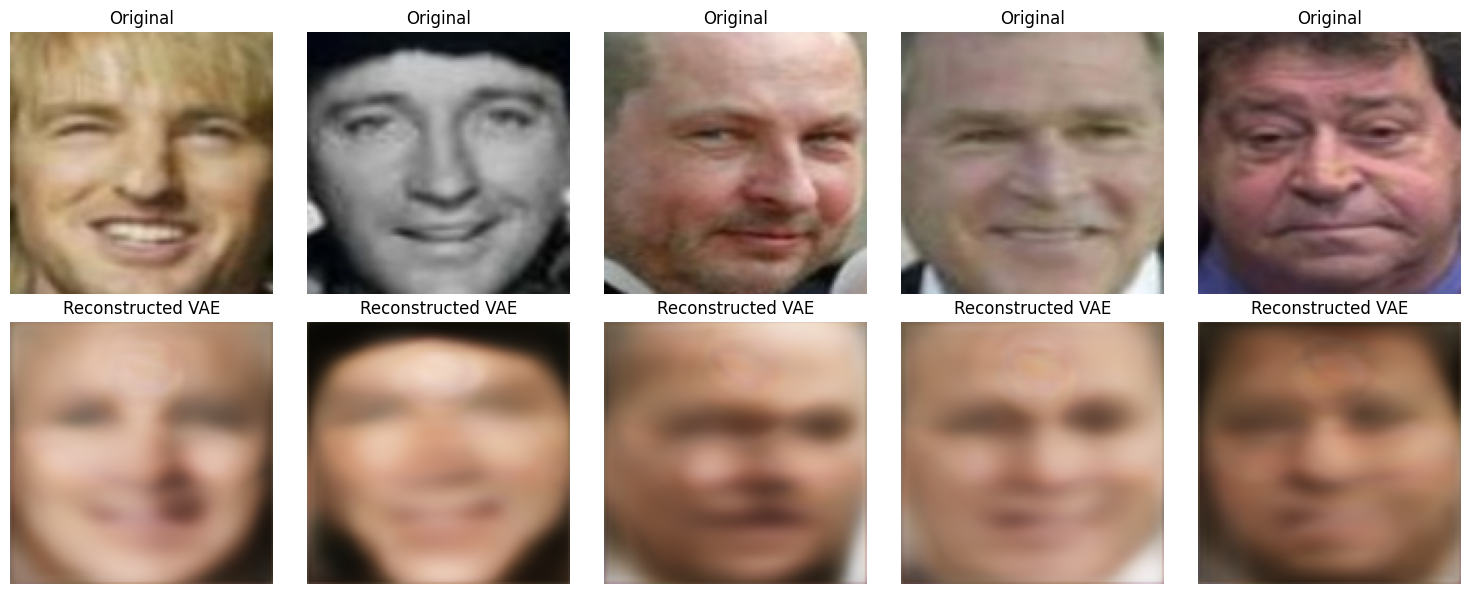

In [51]:
VAE_model.eval()
with torch.no_grad():
  # Get a batch of validation data
  data, _ = next(iter(mtcnn_preprocessed_loader))
  data = data.cuda() # Move data to GPU if available
  reconstructed_vae, _, _ = VAE_model(data)

  # Move data back to CPU for plotting
  data = data.cpu()
  reconstructed_vae = reconstructed_vae.cpu()

  # Plot original and reconstructed images
  fig, axes = plt.subplots(2, 5, figsize=(15, 6))
  for i in range (5):
    # Original images
    axes[0, i].imshow(data[i].permute(1, 2, 0).squeeze(), cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    # Reconstructed images
    axes[1, i].imshow(reconstructed_vae[i].permute(1, 2, 0), cmap='gray')
    axes[1, i].set_title('Reconstructed VAE')
    axes[1, i].axis('off')

  plt.tight_layout()
  plt.show()


# Sampling w/ random noise

In [26]:
def sample_images(model: nn.Module, num_samples: int = 10):
  model.eval()
  with torch.no_grad():
    # Sample from the latent space for VAE
    z = torch.randn(num_samples, model.latent_space_size).cuda() # Latent vector of size latent_space_size
    # For VAE, we can sample from the latent space (eg. from a normal distribution)
    sampled_images = model.decode(z) # Decoded images from latent space

    # Plot the samples
    sampled_images = sampled_images.cpu()
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
      plt.subplot(1, num_samples, i+1)
      plt.imshow(sampled_images[i].permute(1, 2, 0).numpy())
      plt.axis('off')
    plt.show()



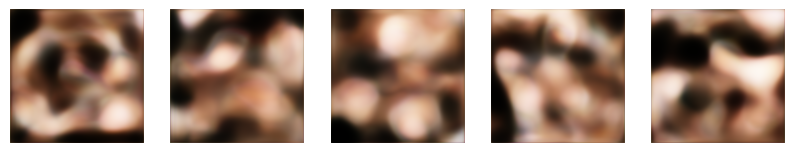

In [50]:
sample_images(VAE_model, num_samples=5)

# Latent Space Exploration

In [28]:
!pip install numpy==1.25.2 --upgrade --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 106.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.2 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.25.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.2 which is incompatible.
blosc2 3.6.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.2 which is incompatible.
t

In [31]:
from sklearn.decomposition import PCA

def visualize_latent_space(vae, dataloader, device='cuda'):
  """
  Visualize the Latent Space Learned by the Variational AutoEncoder Using PCA in 2D.

  Args:
      vae: The trained VAE model.
      dataloader: DataLoader object providing the dataset.
      device: Device the run the model on.
  """
  vae.eval()

  # Collect latent representations and labels
  vae_latents = []
  labels = []

  with torch.no_grad():
    for i, (images, lbls) in enumerate(dataloader):
      images = images.to(device)

      # Get Latent representations from VAE
      mu, var = vae.encode(images)
      vae_latent = vae.reparameterize(mu, var)

      vae_latents.append(torch.flatten(vae_latent, 1))
      labels.extend(lbls.cpu().numpy())

      if i > 1: # Only collect data from a couple of batches
        break

  # Flatten the latent representations and convert labels to numpy array
  vae_latents = torch.cat(vae_latents).cpu().numpy()
  labels = np.array(labels)

  # Apply PCA for dimensionality reduction to 2D
  pca = PCA(n_components=2)
  vae_latents_2d = pca.fit_transform(vae_latents)

  # Plot the 2D scatter plots
  fig, axis = plt.subplots(1, 1, figsize=(12, 5))

  # Plot for Variational AutoEncoder
  scatter_vae = axis.scatter(vae_latents_2d[:, 0], vae_latents_2d[:, 1], c=labels, cmap='tab10', alpha=0.7)
  axis.set_title('Variational AutoEncoder Latent Space')
  axis.set_xlabel('Component 1')
  axis.set_ylabel('Component 2')
  legend = axis.legend(*scatter_vae.legend_elements(), title='Labels')
  axis.add_artist(legend)

  plt.tight_layout()
  plt.show()


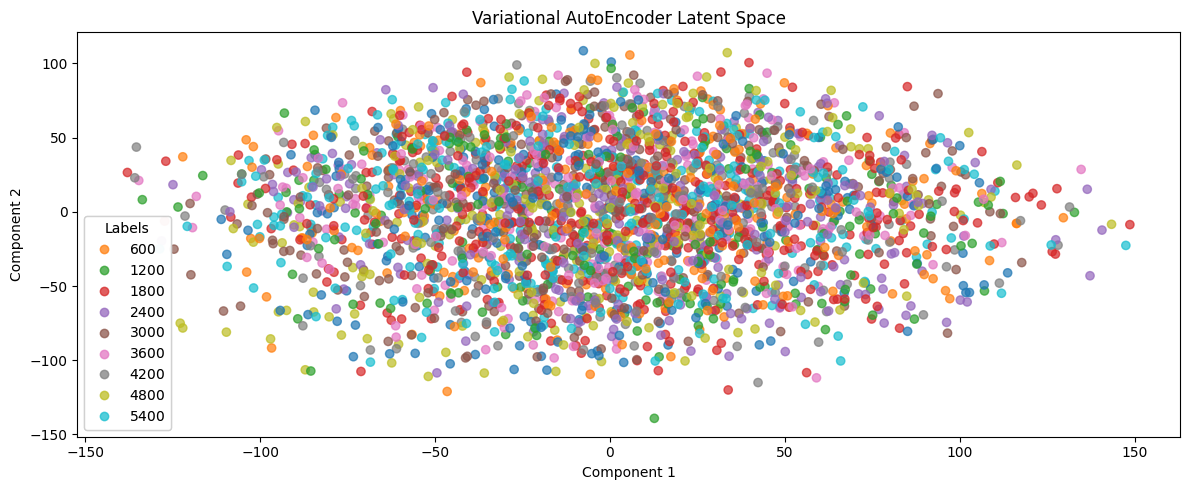

In [32]:
visualize_latent_space(VAE_model, mtcnn_preprocessed_loader)

# Latent Space Interpolation

In [36]:
def interpolate_latent_space(model: nn.Module, start_image, end_image, num_steps=32, device='cuda'):
  """
  Interpolates between two images in the latent space of the model and plots the result.

  Args:
      model (nn.Module): The trained VAE model.
      start_image: The starting image for interpolation (should be in range [0, 1] and shape (C, H, W)).
      end_image: The ending image for interpolation (same shape as start image).
      num_steps: The number of interpolation steps.
      device: Device to run the model on.
  """
  model.eval()
  start_image = start_image.unsqueeze(0).to(device)
  end_image = end_image.unsqueeze(0).to(device)

  # Encode both images in their latent representations
  with torch.no_grad():
    # For VAE, get mu and log_var and reparameterize z
    mu_start, log_var_start = model.encode(start_image)
    mu_end, log_var_end = model.encode(end_image)
    # Reparameterize to get z (latent vectors)
    start_latent = model.reparameterize(mu_start, log_var_start)
    end_latent = model.reparameterize(mu_end, log_var_end)

    # Ensure latent vectors are of same size
    start_latent = torch.flatten(start_latent, 1)
    end_latent = torch.flatten(end_latent, 1)

  # Create linear interpolation between two latent representations
  latents = []
  for alpha in np.linspace(0, 1, num_steps):
    interpolated_latent = (1 - alpha) * start_latent + alpha * end_latent
    latents.append(interpolated_latent)

  # Decode the interpolated latents
  latents = torch.stack(latents).to(device)
  # For VAE, we decode the interpolated latents
  interpolated_images = model.decode(latents)

  # Plot the results
  imterpolated_images = interpolated_images.cpu()
  plt.figure(figsize=(8, 8))
  for i, img in enumerate(interpolated_images):
    plt.subplot(8, 8, i+1) # 4 rows, 8 columns
    plt.imshow(img.permute(1, 2, 0).detach().cpu().numpy())
    plt.axis('off')
  plt.tight_layout()
  plt.show()





In [52]:
random_index1 = torch.randint(0, images.size(0), (1,)).item()
random_index2 = torch.randint(0, images.size(0), (1,)).item()
image1 = images[random_index1]
image2 = images[random_index2]


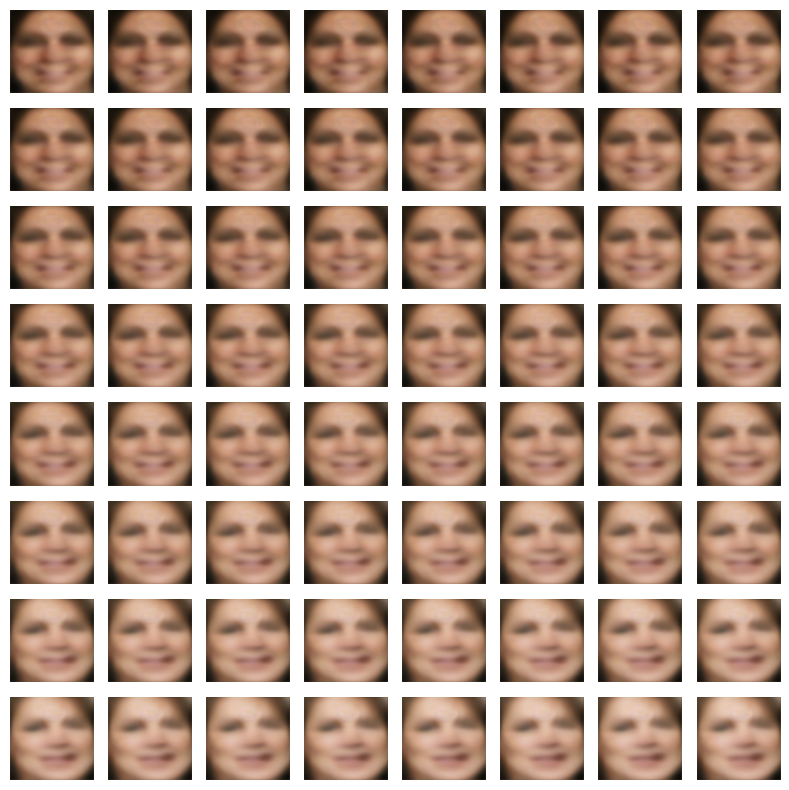

In [53]:
interpolate_latent_space(VAE_model, image1, image2, num_steps=64, device='cuda')